## EM raw data loading

### openNCEM

- https://openncem.readthedocs.io/en/latest/index.html
- https://github.com/ercius/openNCEM

*.dm3 TEM image shape: (2048, 2048)
1 pixel: 0.5436682 nm
*.ser STEM image shape: (1024, 1024)
1 pixel: 1.079526422547315e-09 m


Text(195.03321203758406, 870.4, '200 nm')

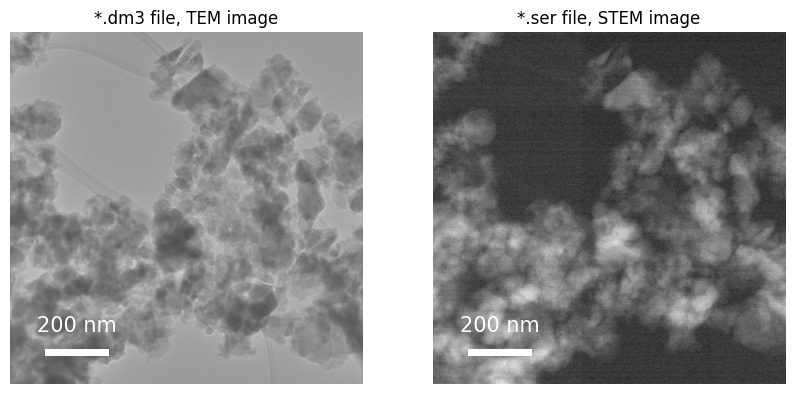

In [2]:
#Install ncempy for loading TEM raw files
#! pip install ncempy 
import ncempy.io as nio

#########################
## File loading
#########################

# Gatan DigitalMicrograph
    # Relative path based on code file path
img_dm3=nio.read('examples\LMP_LATP_19500X_0005.dm3') 
    # Absolute path based on PC
#img_dm3=nio.read(r'C:\Users\j.park\Documents\python\Microscopic-image-processing\Microscopic-Image-Processing\Lectures_for_MultiCOM\examples\LMP_LATP_19500X_0005.dm3')

# Printing the shape and scale of image
print('*.dm3 TEM image shape: ' + str(img_dm3['data'].shape))
print('1 pixel: '+str(img_dm3['pixelSize'][0]) + ' ' +img_dm3['pixelUnit'][0])

# TIA
img_ser=nio.read('examples\LMP_LATP_EDS_Location3_0001_1.ser') 
print('*.ser STEM image shape: ' + str(img_ser['data'].shape))
print('1 pixel: '+str(img_ser['pixelSize'][0]) + ' ' +img_ser['pixelUnit'][0])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(img_dm3['data'], cmap='gray')
ax[0].axis('off')
ax[0].set_title('*.dm3 file, TEM image')

# Add scalebar on the figure
import matplotlib.patches as mpatches
img_w, img_h = img_dm3['data'].shape
scale=img_dm3['pixelSize'][0]/1000/1000/1000 # unit to meter
scalebar=mpatches.Rectangle((img_w*0.1, img_h*0.9), (1/((scale*10**6))*0.2), (img_h*0.02), edgecolor='None', facecolor='white', fill='True')
ax[0].add_patch(scalebar)
ax[0].text((img_w*0.1+0.5*(1/(scale*10**6)*0.2)), (img_h*0.9-img_h*0.05), '200 nm', horizontalalignment='center', fontsize=15, color='white')


      
ax[1].imshow(img_ser['data'], cmap='gray')
ax[1].axis('off')
ax[1].set_title('*.ser file, STEM image')

import matplotlib.patches as mpatches
img_w, img_h = img_ser['data'].shape
scale1=img_ser['pixelSize'][0] # unit to meter
scalebar1=mpatches.Rectangle((img_w*0.1, img_h*0.9), (1/((scale1*10**6))*0.2), (img_h*0.02), edgecolor='None', facecolor='white', fill='True')
ax[1].add_patch(scalebar1)
ax[1].text((img_w*0.1+0.5*(1/(scale1*10**6)*0.2)), (img_h*0.9-img_h*0.05), '200 nm', horizontalalignment='center', fontsize=15, color='white')

In [3]:
print('*.dm3: '+str(img_dm3.keys()))

print('*.ser: '+str(img_ser.keys()))

*.dm3: dict_keys(['filename', 'data', 'pixelUnit', 'pixelSize', 'coords'])
*.ser: dict_keys(['data', 'pixelSize', 'pixelUnit', 'pixelOrigin', 'filename', 'metadata'])


In [81]:
img_ser['metadata']

{'Uuid': '55e52cbc-f15b-47d5-bdc5-3b3731279ee4',
 'AcquireDate': 'Mon Feb 27 14:11:12 2023',
 'Manufacturer': 'FEI (PCI-6110)',
 'DetectorPixelHeight': None,
 'DetectorPixelWidth': None,
 'AcceleratingVoltage': 200000,
 'Tilt1': 0.261759,
 'Tilt2': 0.0,
 'Microscope []': b'Microscope Tecnai 200 kV D485 SuperTwin',
 'User []': b'Service',
 'Gun type []': b'FEG',
 'High tension [kV]': 200,
 'Extraction voltage [V]': 4500,
 'Gun lens []': 3,
 'Emission [uA]': 41.0,
 'Mode []': b' STEM nP SA Zoom Diffraction',
 'Defocus [um]': -0.238,
 'Magnification [x]': 115000,
 'Camera length [m]': 0.1,
 'Stem rotation [deg]': 0.0,
 'Stem rotation correction [deg]': -69.5,
 'Spot size []': 9,
 'Intensity [%]': 28.754,
 'Objective lens [%]': 93.259,
 'Diffraction lens [%]': 43.147,
 'Stage X [um]': 12.457,
 'Stage Y [um]': 36.644,
 'Stage Z [um]': -60.54,
 'Stage A [deg]': 15.0,
 'Stage B [deg]': 0.0,
 'Filter mode []': b'Imaging',
 'Filter slit state []': b'Retracted',
 'Filter slit width [eV]': 20.0,


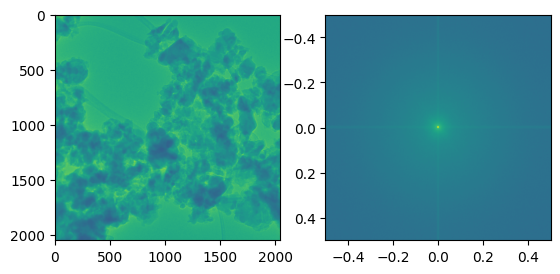

In [51]:
import ncempy.viz as nviz

nviz.im_and_fft(img_dm3['data'])

dict_keys(['data', 'eLoss', 'eOffset', 'eDelta', 'scanCalibration', 'metadata'])


Text(0, 0.5, 'Intensity')

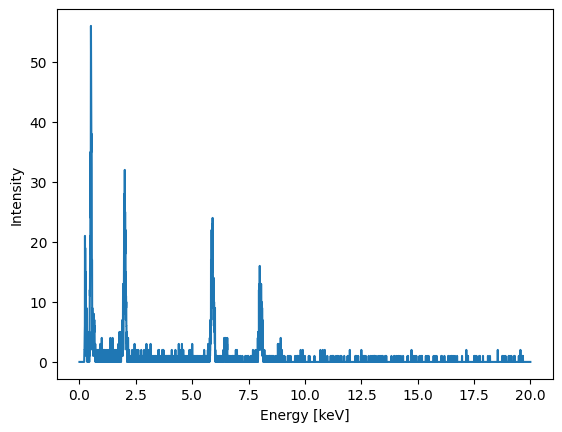

In [6]:
eds_ser=nio.read('examples\LMP_LATP_EDS_Location3_0001_2.ser') # TIA
print(eds_ser.keys())
#print(eds_ser['eDelta'])
plt.plot(eds_ser['eLoss']/1000, eds_ser['data'])
plt.xlabel('Energy [keV]')
plt.ylabel('Intensity')

### Hyperspy

- https://hyperspy.org/
- https://github.com/hyperspy

*.dm3 TEM image shape: (2048, 2048)
1 pixel: 0.5436682105064392 nm
*.ser STEM image shape: (1024, 1024)
1 pixel: 1.079526422547315 nm


Text(195.03321203758406, 870.4, '200 nm')

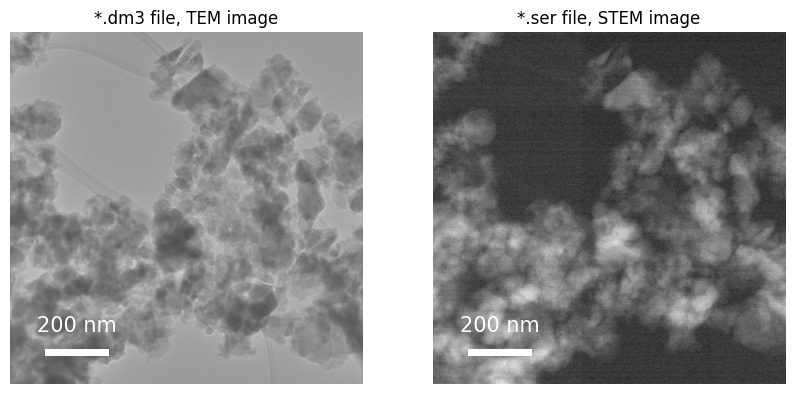

In [7]:
#! pip install hyperspy[all] 
import hyperspy.api as hs

img_dm3=hs.load('examples\LMP_LATP_19500X_0005.dm3') # Gatan DigitalMicrograph
print('*.dm3 TEM image shape: ' + str(img_dm3.data.shape))
print('1 pixel: '+str(img_dm3.axes_manager[0].scale) + ' ' +img_dm3.axes_manager[0].units)

img_ser=hs.load('examples\LMP_LATP_EDS_Location3_0001_1.ser') # TIA
print('*.ser STEM image shape: ' + str(img_ser.data.shape))
print('1 pixel: '+str(img_ser.axes_manager[0].scale) + ' ' +img_ser.axes_manager[0].units)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax[0].imshow(img_dm3.data, cmap='gray')
ax[0].axis('off')
ax[0].set_title('*.dm3 file, TEM image')

# Add scalebar on the figure
import matplotlib.patches as mpatches
img_w, img_h = img_dm3.data.shape
scale=img_dm3.axes_manager[0].scale/1000/1000/1000 # unit to meter
scalebar=mpatches.Rectangle((img_w*0.1, img_h*0.9), (1/((scale*10**6))*0.2), (img_h*0.02), edgecolor='None', facecolor='white', fill='True')
ax[0].add_patch(scalebar)
ax[0].text((img_w*0.1+0.5*(1/(scale*10**6)*0.2)), (img_h*0.9-img_h*0.05), '200 nm', horizontalalignment='center', fontsize=15, color='white')



ax[1].imshow(img_ser.data, cmap='gray')
ax[1].axis('off')
ax[1].set_title('*.ser file, STEM image')

import matplotlib.patches as mpatches
img_w, img_h = img_ser.data.shape
scale1=img_ser.axes_manager[0].scale/1000/1000/1000 # unit to meter
scalebar1=mpatches.Rectangle((img_w*0.1, img_h*0.9), (1/((scale1*10**6))*0.2), (img_h*0.02), edgecolor='None', facecolor='white', fill='True')
ax[1].add_patch(scalebar1)
ax[1].text((img_w*0.1+0.5*(1/(scale1*10**6)*0.2)), (img_h*0.9-img_h*0.05), '200 nm', horizontalalignment='center', fontsize=15, color='white')

In [87]:
print(img_ser.metadata)
#img_ser.original_metadata
print(img_ser.axes_manager)

├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.fei
│   │       ├── operation = load
│   │       └── timestamp = 2023-07-11T10:39:34.103376+02:00
│   ├── original_filename = LMP_LATP_EDS_Location3_0001_1.ser
│   └── title = 
└── Signal
    └── signal_type = 

<Axes manager, axes: (|1024, 1024)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ | ------ | ------- | ------- | ------ 
               x |   1024 |      0 | -5.5e-07 |     1.1 |     nm 
               y |   1024 |      0 | -5.5e-07 |     1.1 |     nm 


In [88]:
print(img_dm3.metadata)
#img_dm3.original_metadata
print(img_dm3.axes_manager)

├── Acquisition_instrument
│   └── TEM
│       ├── acquisition_mode = TEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 200.0
│       ├── magnification = 19500.0
│       └── microscope = FEI Tecnai
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.digital_micrograph
│   │       ├── operation = load
│   │       └── timestamp = 2023-07-11T10:39:34.091377+02:00
│   ├── date = 2023-02-27
│   ├── original_filename = LMP_LATP_19500X_0005.dm3
│   ├── time = 14:16:18
│   └── title = LMP_LATP_19500X_0005
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 0.7560501098632812
    │       └── gain_offset = 0.0
    ├── quantity = Electrons (Counts)
    └── signal_type = 

<Axes manager, axes: (|2048, 2048)>
            Name |   size |  index |  offset |   scale |  units 
================ | ====== | ====== | ======= | ======= | ====== 
---------------- | ------ |

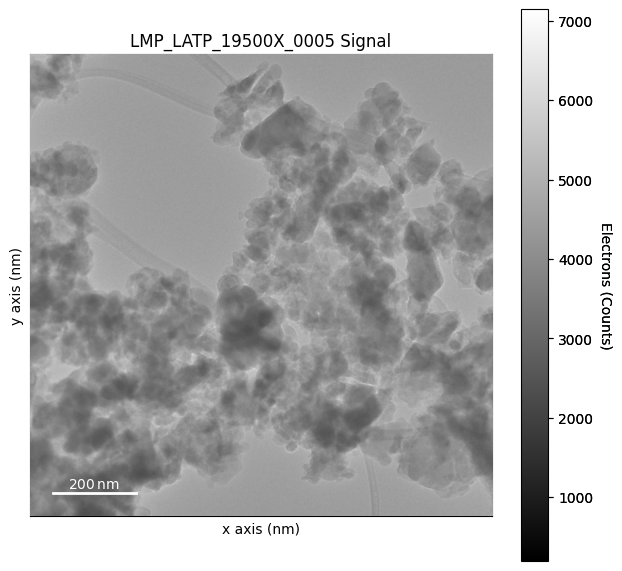

In [90]:
img_dm3.plot()

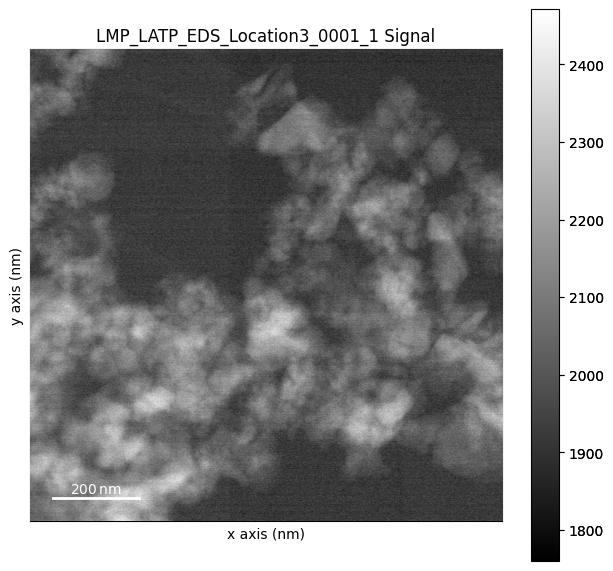

In [91]:
img_ser.plot()

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── Stage
│           └── tilt_alpha = 0.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.fei
│   │       ├── operation = load
│   │       └── timestamp = 2023-07-11T13:33:05.683784+02:00
│   ├── original_filename = LMP_LATP_EDS_Location3_0001_2.ser
│   └── title = 
└── Signal
    └── signal_type = EDS_TEM



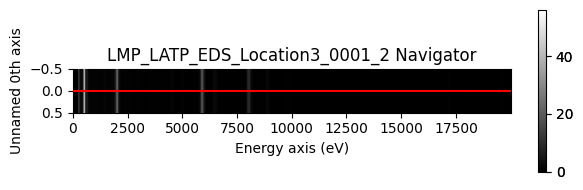

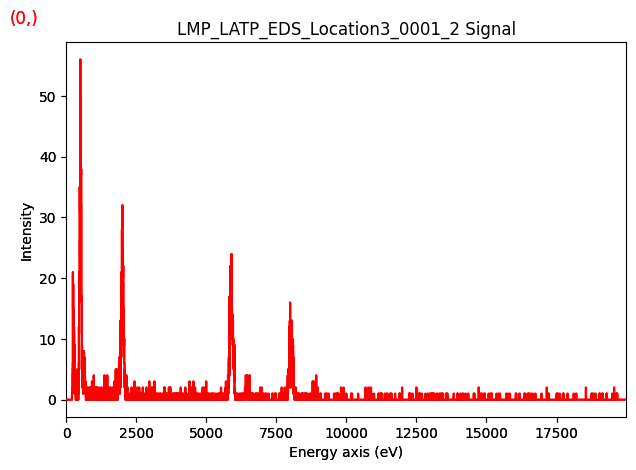

In [26]:
eds_ser=hs.load('examples\LMP_LATP_EDS_Location3_0001_2.ser', signal_type="EDS_TEM") # TIA
print(eds_ser.metadata)
eds_ser.plot()

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── Stage
│           └── tilt_alpha = 0.0
├── General
│   ├── FileIO
│   │   └── 0
│   │       ├── hyperspy_version = 1.7.5
│   │       ├── io_plugin = hyperspy.io_plugins.fei
│   │       ├── operation = load
│   │       └── timestamp = 2023-07-11T13:33:05.683784+02:00
│   ├── original_filename = LMP_LATP_EDS_Location3_0001_2.ser
│   └── title = 
├── Sample
│   ├── elements = ['Al', 'C', 'Cu', 'Mn', 'O', 'P', 'Ti']
│   └── xray_lines = ['Al_Ka', 'C_Ka', 'Cu_Ka', 'Mn_Ka', 'O_Ka', 'P_Ka', 'Ti_Ka']
└── Signal
    └── signal_type = EDS_TEM



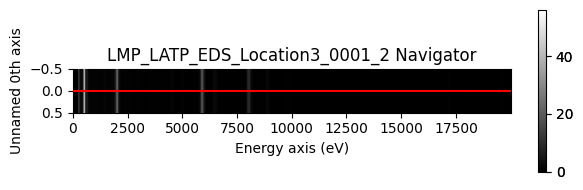

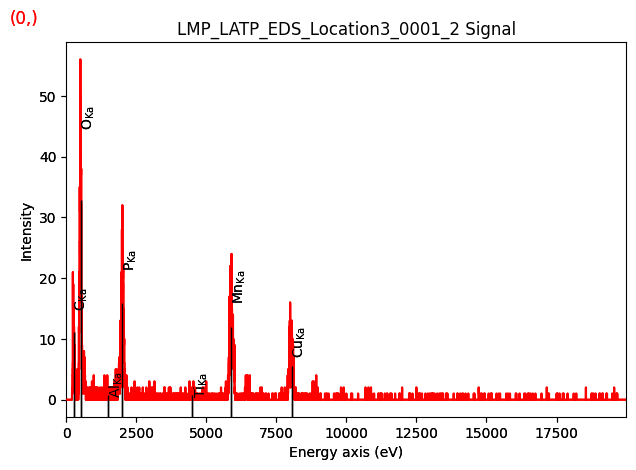

In [27]:
eds_ser.set_elements(['Al', 'Ti', 'P', 'Mn', 'C', 'O', 'Cu'])
eds_ser.add_lines()
print(eds_ser.metadata)
eds_ser.plot(True)

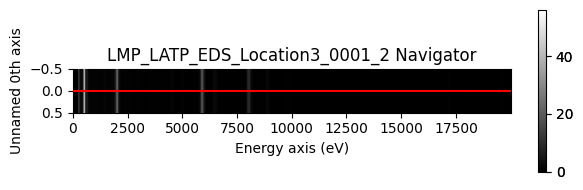

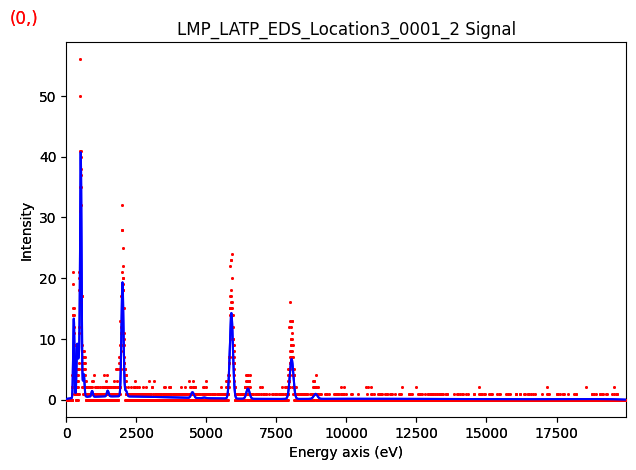

In [30]:
eds_ser.set_microscope_parameters(beam_energy=200)
m=eds_ser.create_model()
#m.print_current_values()
m.fit_background()
#m.calibrate_energy_axis(calibrate='resolution')
m.plot()